In [10]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN

def transform_plot(model, data, all_labels, just_plot=False):
    if just_plot:
        to_plot = data
    else:
        to_plot = model.fit_transform(data)
    
    plt.figure(figsize=(10,7))
    mask_ = (all_labels=="CONFIRMED")
    plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="CONFIRMED", alpha=0.7)

    mask_ = (all_labels=="FALSE POSITIVE")
    plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="FALSE", alpha=0.3)

    plt.legend()
    plt.show()

    return to_plot

In [13]:
df_meta = pd.read_csv("../../KOI_Data/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"].values


latent_dim = 16 #o 32
T = 300 #unico ejecuutado

### Curva de luz Folded-Global

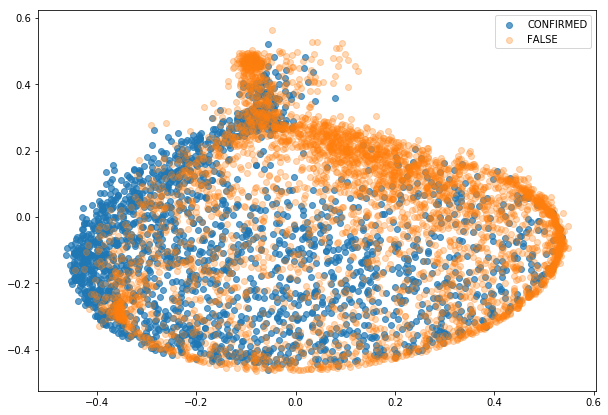

In [21]:
x_lc = np.load("../obj4/data/LC_global_%dT.npy"%T)
x_lc = x_lc/x_lc.std(axis=1, keepdims=True)
x_t = np.load("../obj4/data/Time_global_%dT.npy"%T)

x_all = np.concatenate([x_lc,x_t], axis=-1)
print("data shape=",x_all.shape)

model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

#tsne
model = TSNE(2, metric='euclidean', n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

### Metadata

In [23]:
x_all=np.load("../obj4/LC_features/MetadataLC.npy")
print("data shape=",x_all.shape)

model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

#tsne
model = TSNE(2, metric='euclidean', n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

data shape= (8054, 10)


KeyboardInterrupt: 

### Autoencoder

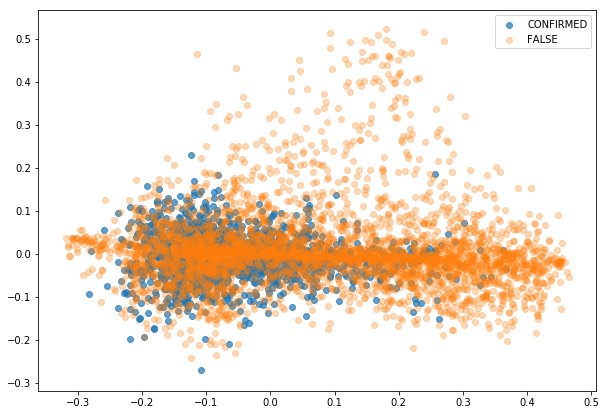

In [14]:
x_all = np.load("./LC_features/AE_%dT_%dD.npy"%(T,latent_dim))
print("data shape=",x_all.shape)

model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

#tsne
model = TSNE(2, metric='euclidean', n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

### Variational Autoencoder

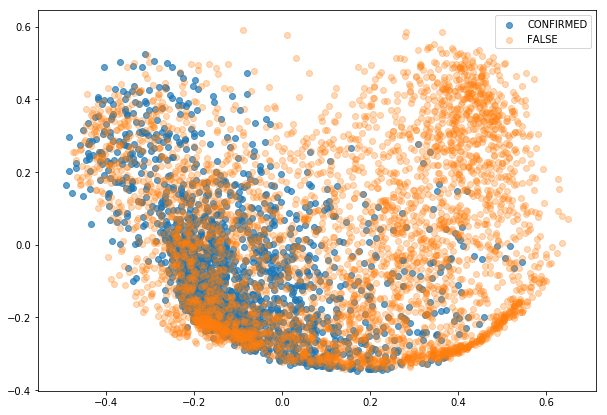

In [15]:
x_all = np.load("./LC_features/VAE_%dT_%dD.npy"%(T,latent_dim))
print("data shape=",x_all.shape)

model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

#tsne
model = TSNE(2, metric='euclidean', n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

### VAE + escala

In [16]:
x_all = np.load("./LC_features/VAE_S_%dT_%dD.npy"%(T,latent_dim))
print("data shape=",x_all.shape)

model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

#tsne
model = TSNE(2, metric='euclidean', n_jobs=-1)
to_plot = transform_plot(model, x_all, all_labels)

### clustering

In [ ]:
#NEW METADATA SELECTED!
metadata_used = ["Period", "Duration", "Time of Transit Epoch", "r/R", "a/R",
                 "Inclination", "Impact Parameter", 
                 "Fitted Stellar Density","Teq",
                 "Limb Darkening Coeff1", "Limb Darkening Coeff2",
                "Teff","Stellar Radius", "Stellar Mass"]
df_meta["Duration"] = df_meta["Duration"]/24

df_meta_obj = df_meta[metadata_used]

scaler_meta = StandardScaler()
scaler_meta.fit(df_meta_obj.values[mask_transit])

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_score(X, labels, metric='euclidean')
davies_bouldin_score
calinski_harabasz_score

In [ ]:

to_clu = StandardScaler().fit_transform(x_all)

model = TSNE(2, metric='euclidean', n_jobs=-1)
#model = KernelPCA(2, kernel='rbf', gamma=None, n_jobs=-1)

to_plot = transform_plot(model, to_clu, all_labels)

In [ ]:
#model = DBSCAN(eps=0.8, min_samples=10, metric='euclidean', n_jobs=-1)
model = DBSCAN(eps=0.1, min_samples=10, metric='cosine', n_jobs=-1)

model.fit(to_clu)
clus_l = model.labels_
K = clus_l.max()+1

print("Cluster encontrados =",K)
clus_l

In [ ]:
#K-means
#Spectrla clus

In [ ]:
plt.figure(figsize=(12,8))
mask_ = (clus_l==-1)
plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="Noise", s=5, c='black')

for i in range(K):
    mask_ = (clus_l==i)
    plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="Clustering "+str(i))
plt.legend()
plt.show() ## euclidean

In [ ]:
plt.figure(figsize=(12,8))
mask_ = (clus_l==-1)
plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="Noise", s=5, c='black')

for i in range(K):
    mask_ = (clus_l==i)
    plt.scatter(to_plot[:,0][mask_],to_plot[:,1][mask_], label="Clustering "+str(i))
plt.legend()
plt.show() ## COSINE

In [ ]:
model = DBSCAN(eps=2.5, min_samples=10, metric='euclidean', n_jobs=-1)

model.fit(to_clu)
clus_l = model.labels_
K = clus_l.max()+1

print("Cluster encontrados =",K)
clus_l

In [ ]:
mask_FP = df_meta["NExScI Disposition"].values ==  "FALSE POSITIVE"
z_FP = z_aux[mask_FP]
aux = StandardScaler().fit_transform(z_FP)

Ks = []
for e in np.arange(0.1,3, 0.1):
    model = DBSCAN(eps=e, min_samples=5, metric='euclidean', n_jobs=-1)

    clus_l = model.fit(aux).labels_
    K = clus_l.max()+1
    Ks.append(K)

In [ ]:
plt.plot(np.arange(0.1,3, 0.1),Ks , 'bo-')
plt.ylabel("Cantidad de cluster")
plt.xlabel("eps (radio)")
plt.title("FALSE POSITIVE")
plt.show()

In [ ]:
plt.plot(np.arange(0.1,3, 0.1),Ks, 'bo-')
plt.ylabel("Cantidad de cluster")
plt.xlabel("eps (radio)")
plt.title("CONFIRMED")
plt.show()

In [ ]:
mask_noise = (clus_l==-1)


n_s = 5

N_is = []
conf_ratios = []
cand_ratios = []
mean_metadatas = []
for i in range(K):
    mask_i = (clus_l==i)

    N_i = np.sum(mask_i*1)
    N_is.append(N_i)
    conf_ratio = np.sum(all_labels[mask_i]=="CONFIRMED") 
    CONF_ratio = conf_ratio/(conf_ratio+np.sum(all_labels[mask_i]=="FALSE POSITIVE")) #over conf and FP
    conf_ratios.append(CONF_ratio)
    CAND_ratio = np.sum(all_labels[mask_i]=="CANDIDATE")/N_i #total
    cand_ratios.append(CAND_ratio)
    metadata_i = df_meta_obj[mask_i]
    mean_metadata = metadata_i.mean().to_frame().T
    mean_metadatas.append(mean_metadata)

    #display(df_clus_i)

    aux = metadata_i.copy()
    aux[:] = scaler_meta.transform(metadata_i)
    plt.figure(figsize=(17,5))
    sns.boxplot(data=aux)
    plt.title("Metadata normalized boxplot of cluster "+str(i))
    plt.show()

    idx_i = np.arange(X_train_all.shape[0])[mask_i]
    idx_i_sampled = np.random.choice(idx_i,size=n_s,replace=False)

    f, axx = plt.subplots(1, n_s, sharex=False, sharey=True,figsize= (17,5))
    for n in range(n_s):
        axx[n].plot(X_train_all[idx_i_sampled[n]])
    #plt.ylim(-1)
    f.suptitle("Curvas de luz muestreadas (RAW) - cluster "+str(i), fontsize="x-large")
    plt.show()

    X_aux = X_train_all[:,:,0]/S_train_all[:,None]
    f, axx = plt.subplots(1, n_s, sharex=False, sharey=True,figsize= (17,5))
    for n in range(n_s):
        axx[n].plot(X_aux[idx_i_sampled[n]])
    f.suptitle("Curvas de luz muestreadas normalizadas - cluster "+str(i), fontsize="x-large")
    plt.show()

In [ ]:
df_clus_i = pd.DataFrame({'#data':N_is, 'CONF_ratio':conf_ratios,'CAND_ratio':cand_ratios})
df_clus_i = pd.concat([df_clus_i, pd.concat(mean_metadatas,ignore_index=True)], axis=1)
df_clus_i